# Đồ án Thực Hành Lập Trình Khoa Học Dữ Liệu

### Bảng thành viên nhóm 9
|<center><div style="width:150px">MSSV</div><center>|<div style="width:290px">Họ và tên</div>|
|---------- |:-------------:|
| <center>20120041<center>  |  Trần Kim Bảo |
| <center>20120071<center>  | Nguyễn Thị Bích Hà |
| <center>20120369<center>  |    Nguyễn Thanh Tân  | 
| <center>20120521<center>  | Trần Thị Phương Linh |

## Import thư viện

In [1]:
!pip install geopandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np
import geopandas as gpd

## Thu thập dữ liệu

- Nhóm sử dụng dữ liệu "population_en_v2.csv" tại https://data.opendevelopmentcambodia.net/en/dataset/vietnam-population-status-2011-2016.
- Tập dữ liệu mô tả tình trạng dân số của các tỉnh Việt Nam từ năm 2011 đến năm 2020.
- LICENSE của dữ liệu là [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/), người dùng được phép sử dụng với mục đích phi thương mại và phải credit cho chủ sở hữu.
- Người ta thu thập dữ liệu tại website [Tổng cục Thống kê](https://www.gso.gov.vn/).

## Khám phá dữ liệu

### Đọc dữ liệu vào Dataframe `population_df`

In [3]:
population_df = pd.read_csv('population_en_v2.csv')
population_df.head()

,Provinces/city,Population density,Average population,Sex ratio,Population grow ratio,15+ labor,Region,Year
0,Ha Noi,2031.1,6761.3,97.8,1.93,3572.9,Hong river Delta,2011
1,Vinh Phuc,818.0,1011.4,97.6,0.38,608.3,Hong river Delta,2011
2,Bac Ninh,1292.6,1063.4,96.7,1.84,593.5,Hong river Delta,2011
3,Quang Ninh,191.4,1168.0,105.4,0.93,675.0,Hong river Delta,2011
4,Hai Duong,1044.6,1729.8,96.1,0.78,1071.0,Hong river Delta,2011


In [4]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Provinces/city         630 non-null    object 
 1   Population density     630 non-null    float64
 2   Average population     630 non-null    float64
 3   Sex ratio              630 non-null    float64
 4   Population grow ratio  630 non-null    float64
 5   15+ labor              630 non-null    float64
 6   Region                 630 non-null    object 
 7   Year                   630 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 39.5+ KB


### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

Tính số dòng và số cột rồi lưu vào 2 biến `num_rows` và `num_cols`.

In [5]:
num_rows, num_cols = population_df.shape
num_rows, num_cols

(630, 8)

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng chứa thông tin dân số của các tỉnh Việt Nam qua các năm từ 2011 đến 2020, không có vấn đề các dòng có ý nghĩa khác nhau.

### Tiến hành kiểm tra các dòng có bị lặp không?

Kiểm tra bằng cách lưu kết quả vào biến `have_duplicated_rows`. Biến có giá trị `True` nếu dữ liệu các dòng bị lặp và `False` nếu ngược lại.

In [6]:
duplicated_list = population_df.duplicated()
if True in duplicated_list.values:
    have_duplicated_rows = True
else:
    have_duplicated_rows = False
have_duplicated_rows

False

Ta có thể thấy không có dòng nào bị lặp cả.

### Mỗi cột có ý nghĩa gì?

Mô tả các cột có trong file "population_en_v2.csv"

|STT|Tên cột dữ liệu | <center>Mô tả<center> | Đơn vị |
|--|:------:| ---| --- |
|1|Provinces/city|<center><center>|
|2|Population density| <center><center>|
|3|Average population|<center><center>|
|4|Published Year| <center><center>|  |
|5|Sex ratio|<center><center>|  | 
|6|Population grow ratio|<center><center>|  
|7|15+ labor|<center><center>|  |
|8| Region|<center><center>| |
|9|Year|<center><center>|  |


### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

Ta tiến hành lấy `dtype` của mỗi cột trong `population_df` và lưu kết quả vào series `col_dtypes`.

In [7]:
#YOUR CODE HERE

YOUR TEXT HERE

In [8]:
#YOUR CODE HERE

### Với mỗi cột, các giá trị được phân bố như thế nào?

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Ở dữ liệu này, hiện có 6 cột thuộc nhóm numeric: `Population density`, `Average population`, `Sex ratio`, `Population grow ratio`, `15+ labor`, `Year`. 

In [9]:
numerical_cols = population_df[['Population density', 'Average population', 'Sex ratio',
                                'Population grow ratio','15+ labor', 'Year']].copy()
numerical_cols

,Population density,Average population,Sex ratio,Population grow ratio,15+ labor,Year
0,2031.1,6761.3,97.80,1.93,3572.90,2011
1,818.0,1011.4,97.60,0.38,608.30,2011
2,1292.6,1063.4,96.70,1.84,593.50,2011
3,191.4,1168.0,105.40,0.93,675.00,2011
4,1044.6,1729.8,96.10,0.78,1071.00,2011
...,...,...,...,...,...,...
625,862.0,1240.7,98.65,0.39,716.78,2020
626,450.0,729.8,101.38,-0.33,402.33,2020
627,361.0,1195.7,99.34,-0.32,641.91,2020
628,342.0,913.5,100.15,0.58,507.76,2020


Với mỗi cột numeric ta sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Và lưu kết quả vào Dataframe `nume_col_profiles_df`.
Dataframe này gồm có:
- 3 dòng là `missing_ratio`, `min`, `max` lần lượt là tỉ lệ các giá trị thiếu mỗi cột, min và max.
- 5 cột là `Population density`, `Average population`, `Sex ratio`, `Population grow ratio`, `15+ labor`, `Year`.

In [10]:
def missing_ratio(c):
    return  c.isna().sum()/len(population_df) * 100

def min(c):
    return c.min()

def max(c):
    return c.max()

nume_col_profiles_df = numerical_cols.agg([missing_ratio, min, max])
nume_col_profiles_df

,Population density,Average population,Sex ratio,Population grow ratio,15+ labor,Year
missing_ratio,0.0,0.0,0.0,0.00,0.0,0.0
min,42.9,300.4,91.1,-1.22,199.6,2011.0
max,4476.0,9227.6,114.1,5.30,4826.0,2020.0


### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào

`population_df` có 2 cột categorical là "Provinces/city", "Region".

In [11]:
pd.set_option('display.max_colwidth', 200)
object_cols=population_df[population_df.select_dtypes(include=['object']).columns]
display(object_cols)

,Provinces/city,Region
0,Ha Noi,Hong river Delta
1,Vinh Phuc,Hong river Delta
2,Bac Ninh,Hong river Delta
3,Quang Ninh,Hong river Delta
4,Hai Duong,Hong river Delta
...,...,...
625,Can Tho,Mekong Delta
626,Hau Giang,Mekong Delta
627,Soc Trang,Mekong Delta
628,Bac Lieu,Mekong Delta


Với mỗi cột categorical, ta tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị khác nhau (không xét giá trị thiếu), list/array các giá trị khác nhau (không xét giá trị thiếu). Kết quả được lưu vào dataframe `cate_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "num_diff_vals", "ratio_diff_vals"; và có 2 cột là "Provinces/city", "Region".

In [12]:
def num_diff_vals(col):
    return len(col.value_counts())

def ratio_diff_vals(col):
    return np.round(col.value_counts(normalize=True),2).to_dict()
cate_col_profiles_df=object_cols.agg([missing_ratio,num_diff_vals,ratio_diff_vals])
cate_col_profiles_df

,Provinces/city,Region
missing_ratio,0.0,0.0
num_diff_vals,63,6
ratio_diff_vals,"{'Ha Giang': 0.02, 'Hai Phong': 0.02, 'Ninh Thuan': 0.02, 'Dak Nong': 0.02, 'Hai Duong': 0.02, 'Long An': 0.02, 'Dien Bien': 0.02, 'Ha Nam': 0.02, 'Thai Nguyen': 0.02, 'Quang Tri': 0.02, 'Lang Son...","{'North Central and Central Coast': 0.22, 'Midlands and northern mountains': 0.22, 'Mekong Delta': 0.21, 'Hong river Delta': 0.17, 'South East': 0.1, 'Highlands': 0.08}"


---

## Đưa ra các câu hỏi

### Câu 4: Vẽ biểu đồ và nhận xét về tỉ lệ tăng dân số với dân số trung bình? Có hiện tượng dân số trung bình tăng nhưng độ tăng dân số giảm hay không? Vì sao?

<h4>Các bước thực hiện:</h4>

- Bước 1: Tính trung bình cho các cột `Population grow ratio` và `average population` theo khu vực
- Bước 2: Vẽ biểu đồ theo từng khu vực
- Bước 3: Vẽ chi tiết biểu đồ tỉ lệ tăng dân số giữa các tỉnh trong 3 năm: 2018, 2019, 2020
- Bước 4: Trả lời câu hỏi: Có hiện tượng dân số trung bình tăng nhưng độ tăng dân số giảm hay không?

##### Bước 1: Tính trung bình cho các cột `Population grow ratio` và `average population` theo khu vực

In [13]:
qs4=population_df.groupby(["Region","Year"])["Population density","Population grow ratio"].mean()

/tmp/ipykernel_44303/2320521108.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  qs4=population_df.groupby(["Region","Year"])["Population density","Population grow ratio"].mean()


In [14]:
qs4_density=qs4["Population density"].to_frame().reset_index([0,1]).pivot("Year","Region","Population density")
qs4_growRatio=qs4["Population grow ratio"].to_frame().reset_index([0,1]).pivot("Year","Region","Population grow ratio")

<h5>Bước 2: Vẽ biểu đồ theo từng khu vực</h5>

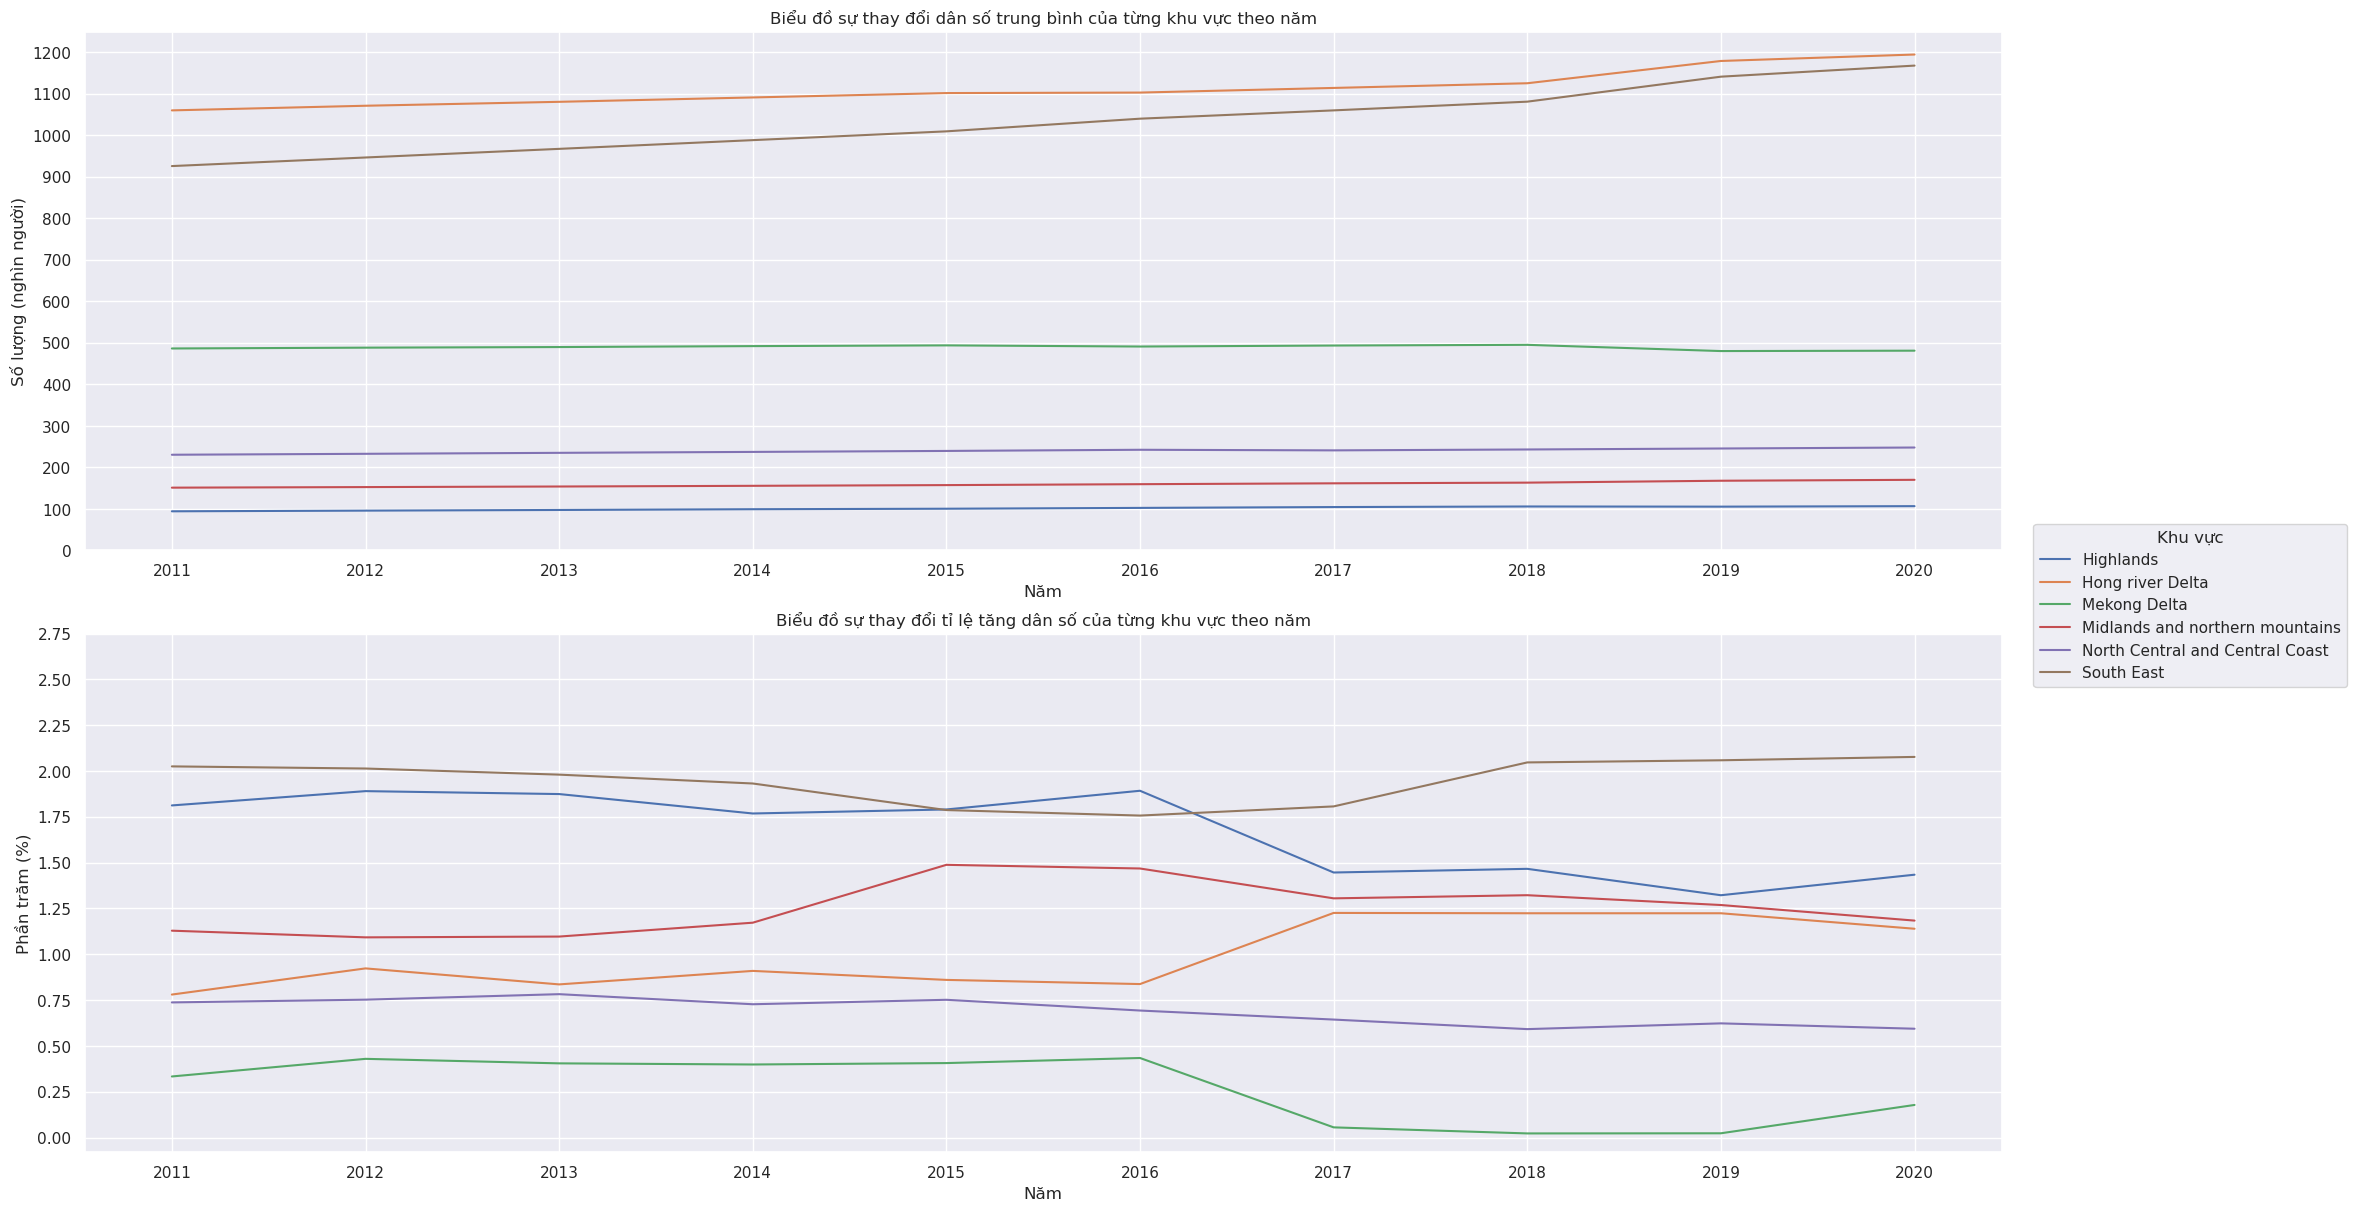

In [15]:
fig, (ax1,ax2)= plt.subplots(2,figsize =(20, 12),constrained_layout = True)

ax1.plot(qs4_density)
ax1.set_xlabel('Năm')
ax1.set_ylabel('Số lượng (nghìn người)')
ax1.set_xticks(np.array(qs4_density.index))
ax1.set_yticks(np.arange(0,np.ceil(qs4_density.values.max()/100)*100+1,100))
ax1.set_title('Biểu đồ sự thay đổi dân số trung bình của từng khu vực theo năm')

ax2.plot(qs4_growRatio)
ax2.set_xlabel('Năm')
ax2.set_ylabel('Phần trăm (%)')
ax2.set_xticks(np.array(qs4_growRatio.index))
ax2.set_yticks(np.arange(0,int(np.ceil(qs4_growRatio.values.max())),0.25))
ax2.set_title('Biểu đồ sự thay đổi tỉ lệ tăng dân số của từng khu vực theo năm')

fig.legend(qs4_growRatio.columns,title='Khu vực',loc='center left',bbox_to_anchor=(1.01,0.5))
plt.show()

<h4>Nhận xét:</h4>

- Dân số trung bình:
    - Thứ tự dân số ở các khu vực không có thay đổi, thứ tự tăng dần dân số: Đồng bằng Sông Hồng, Đông Nam Bộ, Đồng bằng Sông Cửu Long, Bắc Trung Bộ và duyên hải miên Trung, Trung du miền núi phía Bắc, Tây Nguyên.
    - Khu vực Đồng bằng Sông Hồng, Đông Nam Bộ có dân số trung bình tăng theo năm, riêng ở khu vực Đồng bằng Sông Cửu Long có sự giảm dân số ở năm 2018-2020. Các khu vực khác không có sự thay đổi nhiều.

- Tỉ lệ tăng dân số:
    - Các khu vực có sự tăng giảm tỉ lệ dân số theo từng năm. Riêng ở khu vực Đồng bằng Sông Cửu Long ta thấy sự bất thường ở từ năm 2017-2019 tỉ lệ xấp xỉ bằng 0.
    - Năm 2016,2017 hầu hết khu vực đều có sự thay đổi rõ ràng.

<h5>Bước 3: Vẽ chi tiết biểu đồ tỉ lệ tăng dân số giữa các tỉnh trong 3 năm: 2018, 2019, 2020</h5>

In [16]:
vn_map=gpd.read_file('diaphantinhenglish.geojson')

In [17]:
a=np.array(population_df["Provinces/city"].unique())
b=np.array(vn_map.Name)
print(np.setdiff1d(a,b))
print(np.setdiff1d(b,a))

['Ho Chi Minh' 'Thua Thien Hue']
['TP. Ho Chi Minh' 'Thua Thien - Hue']


In [18]:
vn_map.Name=vn_map.Name.replace(['TP. Ho Chi Minh','Thua Thien - Hue'],['Ho Chi Minh','Thua Thien Hue'])

In [19]:
vietnam_map=pd.merge(vn_map,population_df,left_on="Name", right_on="Provinces/city")
vn_map_2018=vietnam_map[vietnam_map.Year==2018]
vn_map_2019=vietnam_map[vietnam_map.Year==2019]
vn_map_2020=vietnam_map[vietnam_map.Year==2020]

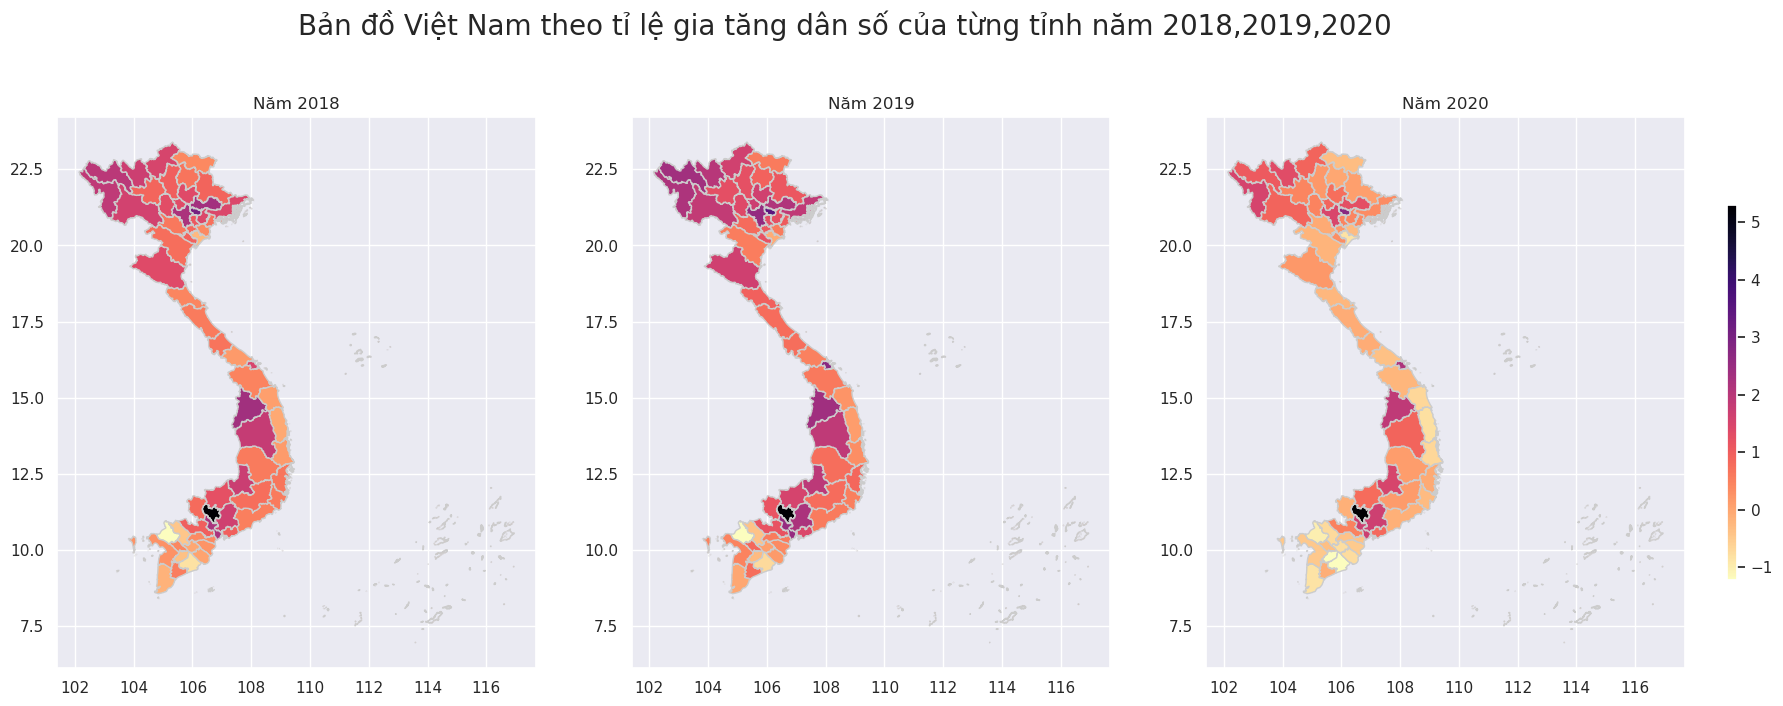

In [28]:
cmap = 'magma_r'
col = "Population grow ratio"

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(21, 15))
# 2018
vmin = vietnam_map[col].min()
vmax = vietnam_map[col].max()
# ax1.axis('off')
vn_map_2018.plot(column=col, ax=ax1, edgecolor='0.8', linewidth=1, cmap=cmap)
ax1.set_title("Năm 2018")
# 2019
# ax2.axis('off')
ax2.set_title("Năm 2019")
vn_map_2019.plot(column=col, ax=ax2, edgecolor='0.8', linewidth=1, cmap=cmap)

# 2020
# ax3.axis('off')
ax3.set_title("Năm 2020")
vn_map_2020.plot(column=col, ax=ax3, edgecolor='0.8', linewidth=1, cmap=cmap)

sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
cbaxes = fig.add_axes([0.92, 0.37, 0.005, 0.25])
cbar = fig.colorbar(sm, cax=cbaxes)

plt.suptitle("Bản đồ Việt Nam theo tỉ lệ gia tăng dân số của từng tỉnh năm 2018,2019,2020",x=0.5,y=0.75,fontsize=20)
plt.show()

In [30]:
nega_grow_ratio=vietnam_map[vietnam_map["Population grow ratio"]<0]
nega_grow_ratio[nega_grow_ratio.Name.duplicated()==True].Name.unique()

array(['An Giang', 'Ca Mau', 'Dong Thap', 'Hau Giang', 'Nam Dinh',
       'Soc Trang', 'Vinh Long'], dtype=object)

<h4>Nhận xét:</h4>

- Có sự giảm tone màu của năm 2020 so với 2 năm 2018 và 2019.
- Các tỉnh: An Giang, Cà Mau, Đồng Tháp, Hậu Giang, Nam Định, Sóc Trăng, Vĩnh Long có nhiều hơn 1 lần có  `tỉ lệ gia tăng dân số`  âm.

<h5>Bước 4: Trả lời câu hỏi: Có hiện tượng dân số trung bình tăng nhưng độ tăng dân số giảm hay không?</h5>

In [31]:
population_df

,Provinces/city,Population density,Average population,Sex ratio,Population grow ratio,15+ labor,Region,Year
0,Ha Noi,2031.1,6761.3,97.80,1.93,3572.90,Hong river Delta,2011
1,Vinh Phuc,818.0,1011.4,97.60,0.38,608.30,Hong river Delta,2011
2,Bac Ninh,1292.6,1063.4,96.70,1.84,593.50,Hong river Delta,2011
3,Quang Ninh,191.4,1168.0,105.40,0.93,675.00,Hong river Delta,2011
4,Hai Duong,1044.6,1729.8,96.10,0.78,1071.00,Hong river Delta,2011
...,...,...,...,...,...,...,...,...
625,Can Tho,862.0,1240.7,98.65,0.39,716.78,Mekong Delta,2020
626,Hau Giang,450.0,729.8,101.38,-0.33,402.33,Mekong Delta,2020
627,Soc Trang,361.0,1195.7,99.34,-0.32,641.91,Mekong Delta,2020
628,Bac Lieu,342.0,913.5,100.15,0.58,507.76,Mekong Delta,2020


In [90]:
def step4(population_df):
    df = pd.DataFrame(columns=['Provinces/city','Year'])
    for i in range(2011,2020,1):
        now=population_df[population_df.Year==i]
        next=population_df[population_df.Year==i+1]
        a=np.where(now["Average population"].values<next["Average population"].values)
        b=np.where(now["Population grow ratio"].values>next["Population grow ratio"].values)
        index=np.intersect1d(a, b)
        df=pd.concat([df,now.iloc[index,[0,-1]]])
    return df
qs4=step4(population_df)
qs4["Provinces/city"].value_counts()

Ha Nam       7
Bac Kan      7
Da Nang      7
Ha Giang     6
Long An      6
            ..
Dong Thap    2
Cao Bang     2
Bac Lieu     2
Quang Tri    2
Ca Mau       2
Name: Provinces/city, Length: 63, dtype: int64

<h4>Trả lời: </h4>

- Tồn tại hiện tượng dân số trung bình tăng nhưng tỉ lệ tăng dân số giảm.

<h4>Vì:</h4>

- Tỉ lệ gia tăng dân số là tỉ lệ thể hiện sự chệnh lệch giữa tỉ lệ sinh thô và tỉ lệ tử vong thô trong một dân số nhất định. Nên khi tỉ lệ dân số giảm có nghĩa là dân số đang già hóa hơn, tỉ lệ tử vong nhiều hơn tỉ lệ sinh.
- Tỉ lệ tăng dân số giảm, nhưng vẫn dương.
- Dân số trẻ và đang trong độ tuổi sinh nở nhiều, dẫn đến tỉ lệ sinh thô sẽ cao hơn tỉ lệ tử vong.

## Tiền xử lý và phân tích dữ liệu để trả lời cho từng câu hỏi